In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import pickle
import os

In [7]:
# Paths
DATA_DIR = 'data'
MODEL_DIR = 'models'
os.makedirs(MODEL_DIR, exist_ok=True)

In [17]:
# Helper: Load a txt file into a DataFrame
def load_txt(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            if ';' in line:
                text, label = line.strip().split(';', 1)  # only split on first semicolon
                data.append((text.strip(), label.strip()))
    return pd.DataFrame(data, columns=['text', 'emotion'])

In [19]:
# Load data
train_df = load_txt(os.path.join(DATA_DIR, 'train.txt'))
test_df = load_txt(os.path.join(DATA_DIR, 'test.txt'))
val_df = load_txt(os.path.join(DATA_DIR, 'val.txt'))

In [21]:
# Combine training and validation for final training
full_train_df = pd.concat([train_df, val_df])

In [23]:
# Vectorize text
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(full_train_df['text'])
y_train = full_train_df['emotion']

In [25]:
# Train model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [27]:
# Evaluate on test set
X_test = vectorizer.transform(test_df['text'])
y_test = test_df['emotion']
y_pred = model.predict(X_test)

In [29]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

       anger       0.92      0.66      0.77       275
        fear       0.84      0.64      0.73       224
         joy       0.78      0.96      0.86       695
        love       0.87      0.35      0.50       159
     sadness       0.76      0.93      0.84       581
    surprise       1.00      0.08      0.14        66

    accuracy                           0.80      2000
   macro avg       0.86      0.60      0.64      2000
weighted avg       0.81      0.80      0.77      2000



In [31]:
# Save model and vectorizer
with open(os.path.join(MODEL_DIR, 'naive_bayes_model.pkl'), 'wb') as f:
    pickle.dump((vectorizer, model), f)
print("✅ Model trained and saved successfully to 'models/naive_bayes_model.pkl'")


✅ Model trained and saved successfully to 'models/naive_bayes_model.pkl'


#  Loading Model 

In [9]:
MODEL_DIR = 'models'

with open(os.path.join(MODEL_DIR, 'naive_bayes_model.pkl'), 'rb') as f:
    vectorizer, model = pickle.load(f)

In [11]:
def load_txt(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            if ';' in line:
                text, label = line.strip().split(';', 1)
                data.append((text.strip(), label.strip()))
    return pd.DataFrame(data, columns=['text', 'emotion'])

DATA_DIR = 'data'
test_df = load_txt(os.path.join(DATA_DIR, 'test.txt'))

X_test = vectorizer.transform(test_df['text'])
y_test = test_df['emotion']

Accuracy: 0.7955

Classification Report:
               precision    recall  f1-score   support

       anger       0.92      0.66      0.77       275
        fear       0.84      0.64      0.73       224
         joy       0.78      0.96      0.86       695
        love       0.87      0.35      0.50       159
     sadness       0.76      0.93      0.84       581
    surprise       1.00      0.08      0.14        66

    accuracy                           0.80      2000
   macro avg       0.86      0.60      0.64      2000
weighted avg       0.81      0.80      0.77      2000



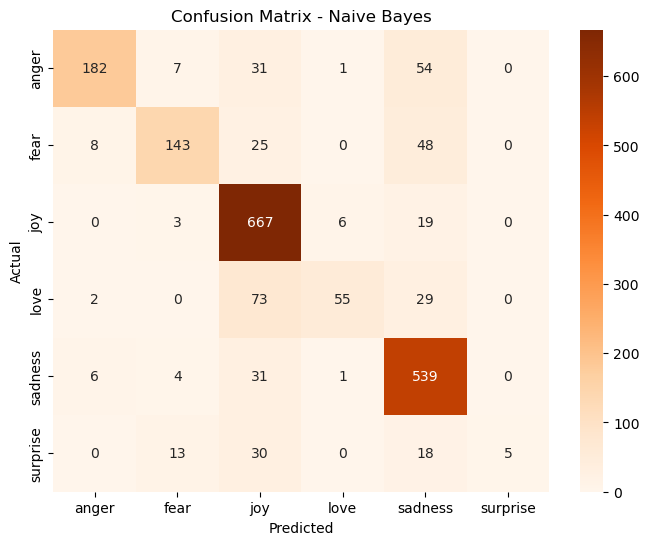

In [13]:
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


In [5]:
new_data = pd.read_csv('data/text.csv')

In [10]:
# Optional: Drop Unnamed index if exists
new_data.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

# 2. Prepare features and target
X = new_data['text']
y = new_data['label']  # numeric labels

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Vectorize text
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 5. Train model - Multinomial Naive Bayes
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# 6. Evaluate
y_pred = model.predict(X_test_vec)

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("🧾 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 7. Save model
os.makedirs('models', exist_ok=True)
with open('models/naive_bayes_model.pkl', 'wb') as f:
    pickle.dump((vectorizer, model), f)

print("✅ Naive Bayes model trained and saved successfully.")

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91     24201
           1       0.85      0.93      0.89     28164
           2       0.83      0.62      0.71      6929
           3       0.91      0.85      0.88     11441
           4       0.84      0.82      0.83      9594
           5       0.88      0.40      0.55      3033

    accuracy                           0.86     83362
   macro avg       0.86      0.76      0.79     83362
weighted avg       0.86      0.86      0.86     83362

🧾 Confusion Matrix:
[[22771   763    60   318   273    16]
 [  864 26190   738   156   179    37]
 [  316  2208  4298    64    42     1]
 [  949   422    56  9728   279     7]
 [  840   415    25   382  7821   111]
 [  305   727    23    38   712  1228]]
✅ Naive Bayes model trained and saved successfully.


Text(0.5, 1.0, 'Confusion Matrix Heatmap - Naive Bayes')

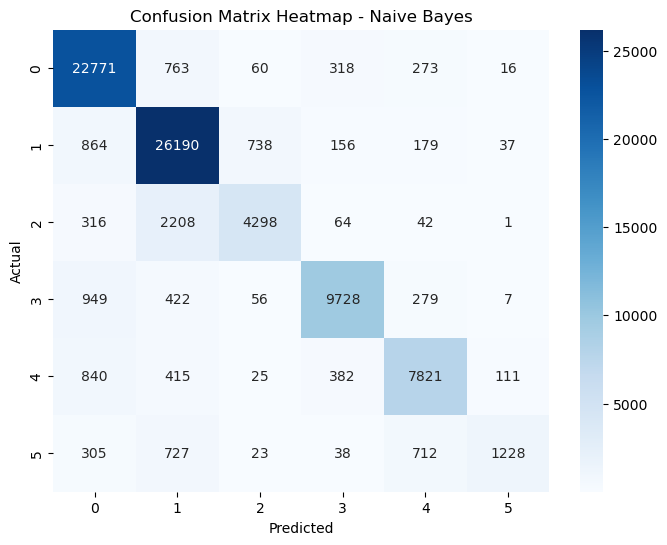

In [12]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(y.unique()), 
            yticklabels=sorted(y.unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap - Naive Bayes')
